In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('bikers_semi_final.csv',low_memory=False)

In [5]:
df.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10238 entries, 0 to 10237
Data columns (total 152 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     10238 non-null  int64  
 1   Unnamed: 0.1                   10238 non-null  int64  
 2   PERSON_ID                      10238 non-null  object 
 3   PERSON_TYPE                    10238 non-null  object 
 4   CRASH_RECORD_ID                10238 non-null  object 
 5   RD_NO_x                        10217 non-null  object 
 6   CRASH_DATE_x                   10238 non-null  object 
 7   CITY                           8802 non-null   object 
 8   STATE                          8700 non-null   object 
 9   ZIPCODE                        7320 non-null   object 
 10  SEX                            10094 non-null  object 
 11  AGE                            8717 non-null   float64
 12  SAFETY_EQUIPMENT               10104 non-null

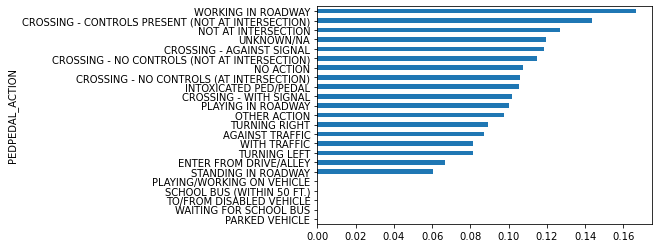

In [6]:
df.groupby(by=['PEDPEDAL_ACTION'])['INJURY_BAD'].mean().sort_values().plot(kind='barh');

In [7]:
df['PEDPEDAL_ACTION'].value_counts()

WITH TRAFFIC                                         3582
UNKNOWN/NA                                           1165
OTHER ACTION                                         1045
CROSSING - WITH SIGNAL                                983
NO ACTION                                             678
CROSSING - AGAINST SIGNAL                             514
AGAINST TRAFFIC                                       505
CROSSING - NO CONTROLS (AT INTERSECTION)              397
TURNING LEFT                                          369
CROSSING - NO CONTROLS (NOT AT INTERSECTION)          244
ENTER FROM DRIVE/ALLEY                                180
CROSSING - CONTROLS PRESENT (NOT AT INTERSECTION)     160
TURNING RIGHT                                         157
NOT AT INTERSECTION                                   134
INTOXICATED PED/PEDAL                                  38
STANDING IN ROADWAY                                    33
PARKED VEHICLE                                         27
PLAYING IN ROA

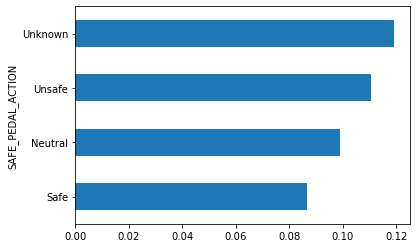

In [8]:
df.loc[df['PEDPEDAL_ACTION'] == 'WITH TRAFFIC', 'SAFE_PEDAL_ACTION'] = 'Safe'
df.loc[df['PEDPEDAL_ACTION'] == 'TURNING LEFT', 'SAFE_PEDAL_ACTION'] = 'Safe'
df.loc[df['PEDPEDAL_ACTION'] == 'TURNING RIGHT', 'SAFE_PEDAL_ACTION'] = 'Safe'
df.loc[df['PEDPEDAL_ACTION'] == 'CROSSING - WITH SIGNAL', 'SAFE_PEDAL_ACTION'] = 'Safe'
df.loc[df['PEDPEDAL_ACTION'] == 'ENTER FROM DRIVE/ALLEY', 'SAFE_PEDAL_ACTION'] = 'Safe'
df.loc[df['PEDPEDAL_ACTION'] == 'CROSSING - NO CONTROLS (AT INTERSECTION)', 'SAFE_PEDAL_ACTION'] = 'Safe'

df.loc[df['PEDPEDAL_ACTION'] == 'NO ACTION', 'SAFE_PEDAL_ACTION'] = 'Neutral'
df.loc[df['PEDPEDAL_ACTION'] == 'OTHER ACTION', 'SAFE_PEDAL_ACTION'] = 'Neutral'
df.loc[df['PEDPEDAL_ACTION'] == 'STANDING IN ROADWAY', 'SAFE_PEDAL_ACTION'] = 'Neutral'
df.loc[df['PEDPEDAL_ACTION'] == 'PARKED VEHICLE', 'SAFE_PEDAL_ACTION'] = 'Neutral'
df.loc[df['PEDPEDAL_ACTION'] == 'WAITING FOR SCHOOL BUS', 'SAFE_PEDAL_ACTION'] = 'Neutral'
df.loc[df['PEDPEDAL_ACTION'] == 'SCHOOL BUS (WITHIN 50 FT.)', 'SAFE_PEDAL_ACTION'] = 'Neutral'

df.loc[df['PEDPEDAL_ACTION'] == 'CROSSING - CONTROLS PRESENT (NOT AT INTERSECTION)', 'SAFE_PEDAL_ACTION'] = 'Unsafe'
df.loc[df['PEDPEDAL_ACTION'] == 'AGAINST TRAFFIC', 'SAFE_PEDAL_ACTION'] = 'Unsafe'
df.loc[df['PEDPEDAL_ACTION'] == 'CROSSING - AGAINST SIGNAL', 'SAFE_PEDAL_ACTION'] = 'Unsafe'
df.loc[df['PEDPEDAL_ACTION'] == 'CROSSING - NO CONTROLS (NOT AT INTERSECTION)', 'SAFE_PEDAL_ACTION'] = 'Unsafe'
df.loc[df['PEDPEDAL_ACTION'] == 'NOT AT INTERSECTION', 'SAFE_PEDAL_ACTION'] = 'Unsafe'
df.loc[df['PEDPEDAL_ACTION'] == 'INTOXICATED PED/PEDAL', 'SAFE_PEDAL_ACTION'] = 'Unsafe'
df.loc[df['PEDPEDAL_ACTION'] == 'PLAYING IN ROADWAY', 'SAFE_PEDAL_ACTION'] = 'Unsafe'
df.loc[df['PEDPEDAL_ACTION'] == 'WORKING IN ROADWAY', 'SAFE_PEDAL_ACTION'] = 'Unsafe'
df.loc[df['PEDPEDAL_ACTION'] == 'PLAYING/WORKING ON VEHICLE', 'SAFE_PEDAL_ACTION'] = 'Unsafe'
df.loc[df['PEDPEDAL_ACTION'] == 'TO/FROM DISABLED VEHICLE', 'SAFE_PEDAL_ACTION'] = 'Unsafe'

df.loc[df['PEDPEDAL_ACTION'] == 'UNKNOWN/NA', 'SAFE_PEDAL_ACTION'] = 'Unknown'

df.groupby(by=['SAFE_PEDAL_ACTION'])['INJURY_BAD'].mean().sort_values().plot(kind='barh');

In [17]:
bf = df.iloc[:,-16:]

In [18]:
bf.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10238 entries, 0 to 10237
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   INJURY_BAD            10236 non-null  float64
 1   HELMET_USED           10104 non-null  object 
 2   age_bins              10238 non-null  object 
 3   SAFE_PEDAL_ACTION     10236 non-null  object 
 4   PROTECTIVE_CLOTHING   10236 non-null  float64
 5   SAFE_LOCATION         10236 non-null  object 
 6   WEATHER_CAT           10238 non-null  object 
 7   road_surf_bins        10238 non-null  object 
 8   DAYTIME               10238 non-null  int64  
 9   SPEED_RATING          10238 non-null  object 
 10  UNSAFE_ACTION         10040 non-null  object 
 11  DRIVER_BLIND          10003 non-null  object 
 12  cause_bins            5935 non-null   object 
 13  driver_maneuver_bins  10238 non-null  object 
 14  physical_bins         10238 non-null  object 
 15  hour_bins          

In [23]:
bf['SEX'] = df['SEX']

In [24]:
bf.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10238 entries, 0 to 10237
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   INJURY_BAD            10236 non-null  float64
 1   HELMET_USED           10104 non-null  object 
 2   age_bins              10238 non-null  object 
 3   SAFE_PEDAL_ACTION     10236 non-null  object 
 4   PROTECTIVE_CLOTHING   10236 non-null  float64
 5   SAFE_LOCATION         10236 non-null  object 
 6   WEATHER_CAT           10238 non-null  object 
 7   road_surf_bins        10238 non-null  object 
 8   DAYTIME               10238 non-null  int64  
 9   SPEED_RATING          10238 non-null  object 
 10  UNSAFE_ACTION         10040 non-null  object 
 11  DRIVER_BLIND          10003 non-null  object 
 12  cause_bins            5935 non-null   object 
 13  driver_maneuver_bins  10238 non-null  object 
 14  physical_bins         10238 non-null  object 
 15  hour_bins          

In [34]:
bf.isna().sum()

INJURY_BAD                 2
HELMET_USED              134
age_bins                   0
SAFE_PEDAL_ACTION          2
PROTECTIVE_CLOTHING        2
SAFE_LOCATION              2
WEATHER_CAT                0
road_surf_bins             0
DAYTIME                    0
SPEED_RATING               0
UNSAFE_ACTION            198
DRIVER_BLIND             235
cause_bins              4303
driver_maneuver_bins       0
physical_bins              0
hour_bins                  0
SEX                      144
dtype: int64

In [37]:
bf = bf.fillna('Unknown')

In [38]:
bf.isna().sum()

INJURY_BAD              0
HELMET_USED             0
age_bins                0
SAFE_PEDAL_ACTION       0
PROTECTIVE_CLOTHING     0
SAFE_LOCATION           0
WEATHER_CAT             0
road_surf_bins          0
DAYTIME                 0
SPEED_RATING            0
UNSAFE_ACTION           0
DRIVER_BLIND            0
cause_bins              0
driver_maneuver_bins    0
physical_bins           0
hour_bins               0
SEX                     0
dtype: int64

In [42]:
bf.columns

Index(['INJURY_BAD', 'HELMET_USED', 'age_bins', 'SAFE_PEDAL_ACTION',
       'PROTECTIVE_CLOTHING', 'SAFE_LOCATION', 'WEATHER_CAT', 'road_surf_bins',
       'DAYTIME', 'SPEED_RATING', 'UNSAFE_ACTION', 'DRIVER_BLIND',
       'cause_bins', 'driver_maneuver_bins', 'physical_bins', 'hour_bins',
       'SEX'],
      dtype='object')

In [76]:
bf['INJURY_BAD'].value_counts()

0.0    9253
1.0     985
Name: INJURY_BAD, dtype: int64

In [46]:
bf['INJURY_BAD'].replace('Unknown',0,inplace=True)

In [81]:
bf['HELMET_USED'].value_counts()

0.0    6010
1.0    3205
100    1023
Name: HELMET_USED, dtype: int64

In [49]:
bf['HELMET_USED'].replace('Unknown',100,inplace=True)

In [71]:
bf['SEX'].value_counts()

M          8084
F          1944
Unknown     144
X            66
Name: SEX, dtype: int64

In [54]:
bf['PROTECTIVE_CLOTHING'].replace('Unknown',100,inplace=True)

In [57]:
bf['SAFE_LOCATION'].replace('Unknown',100,inplace=True)

In [65]:
bf['DRIVER_BLIND'].replace('Unknown',100,inplace=True)

In [74]:
bf.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10238 entries, 0 to 10237
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   INJURY_BAD            10238 non-null  float64
 1   HELMET_USED           10238 non-null  object 
 2   age_bins              10238 non-null  object 
 3   SAFE_PEDAL_ACTION     10238 non-null  object 
 4   PROTECTIVE_CLOTHING   10238 non-null  float64
 5   SAFE_LOCATION         10238 non-null  object 
 6   WEATHER_CAT           10238 non-null  object 
 7   road_surf_bins        10238 non-null  object 
 8   DAYTIME               10238 non-null  int64  
 9   SPEED_RATING          10238 non-null  object 
 10  UNSAFE_ACTION         10238 non-null  object 
 11  DRIVER_BLIND          10238 non-null  object 
 12  cause_bins            10238 non-null  object 
 13  driver_maneuver_bins  10238 non-null  object 
 14  physical_bins         10238 non-null  object 
 15  hour_bins          

In [85]:
bf['INJURY_BAD'] = bf['INJURY_BAD'].astype(float)

In [84]:
bf['HELMET_USED'] = bf['HELMET_USED'].astype(float)

In [88]:
bf['PROTECTIVE_CLOTHING'] = bf['PROTECTIVE_CLOTHING'].astype(float)

In [90]:
bf['SAFE_LOCATION'] = bf['SAFE_LOCATION'].astype(float)

In [97]:
bf['DRIVER_BLIND'] = bf['DRIVER_BLIND'].astype(float)

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [105]:
y = bf['INJURY_BAD']
X = bf.drop('INJURY_BAD',axis=1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=312)

In [32]:
from sklearn.preprocessing import OneHotEncoder

In [106]:
ohe = OneHotEncoder()
X_encoded = ohe.fit_transform(X_train)

In [116]:
dt = DecisionTreeClassifier(max_depth=3,random_state=312,class_weight='balanced')
dt.fit(X_encoded,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3, random_state=312)

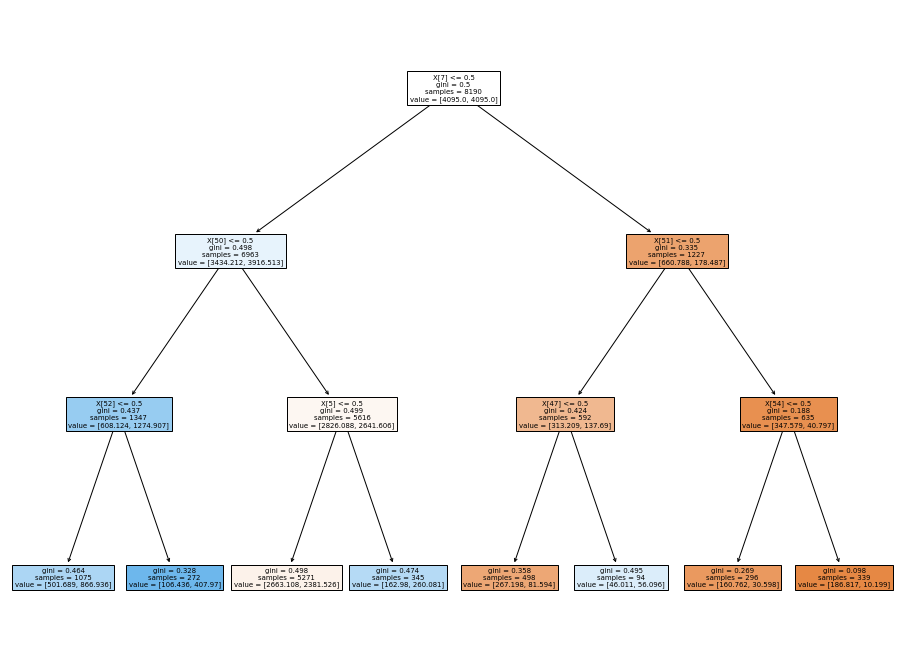

In [118]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))
plot_tree(dt, filled=True)
plt.show()

In [ ]:
from imblearn.under_sampling import R